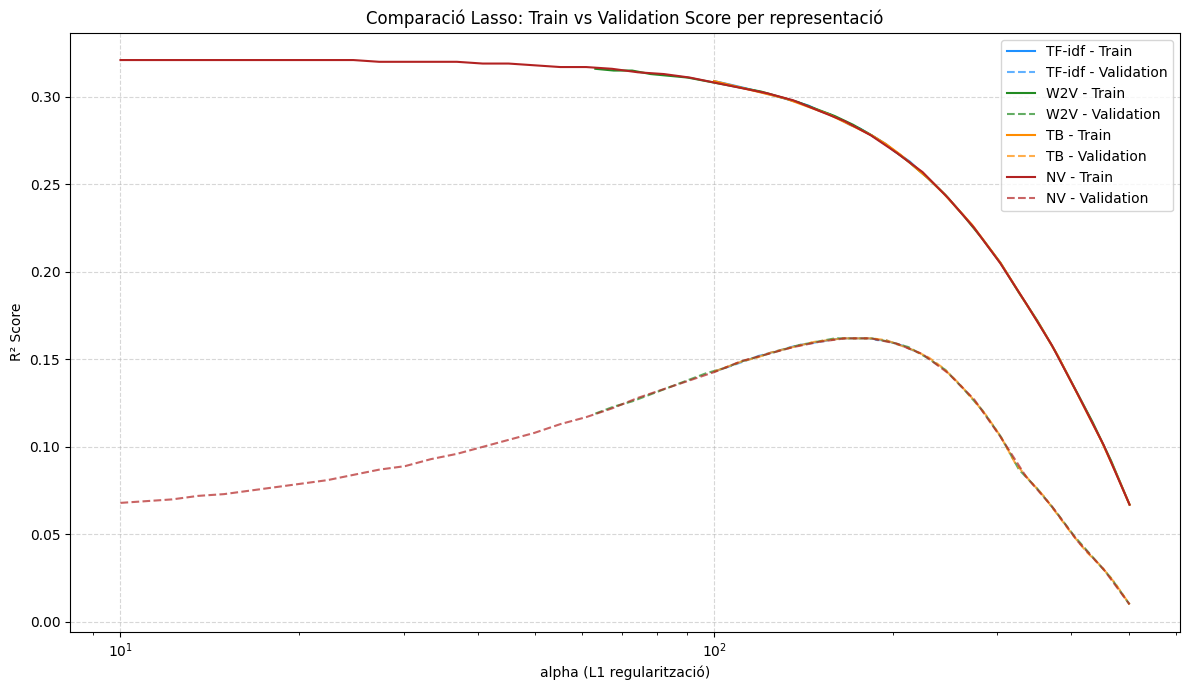

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Diccionari amb noms de fitxers i colors base
models = {
    'TF-idf': ('data/lasso_TF-idf.pkl', 'dodgerblue'),
    'W2V':    ('data/lasso_W2V.pkl',    'forestgreen'),
    'TB':     ('data/lasso_TB.pkl',     'darkorange'),
    'NV':     ('data/lasso_NV.pkl',     'firebrick')
}

plt.figure(figsize=(12, 7))

for name, (path, color) in models.items():
    df = pd.read_pickle(path)
    alpha = df['alpha']
    train = df['train_score_mean']
    val = df['val_score_mean']
    
    # L√≠nia de train (m√©s clara)
    plt.plot(alpha, train, label=f"{name} - Train", color=color, linestyle='-')
    
    # L√≠nia de validaci√≥ (mateix color, m√©s fosc)
    plt.plot(alpha, val, label=f"{name} - Validation", color=color, linestyle='--', alpha=0.7)

plt.xscale('log')  # Œ± normalment es representa millor en escala logar√≠tmica
plt.xlabel('alpha (L1 regularitzaci√≥)')
plt.ylabel('R¬≤ Score')
plt.title('Comparaci√≥ Lasso: Train vs Validation Score per representaci√≥')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


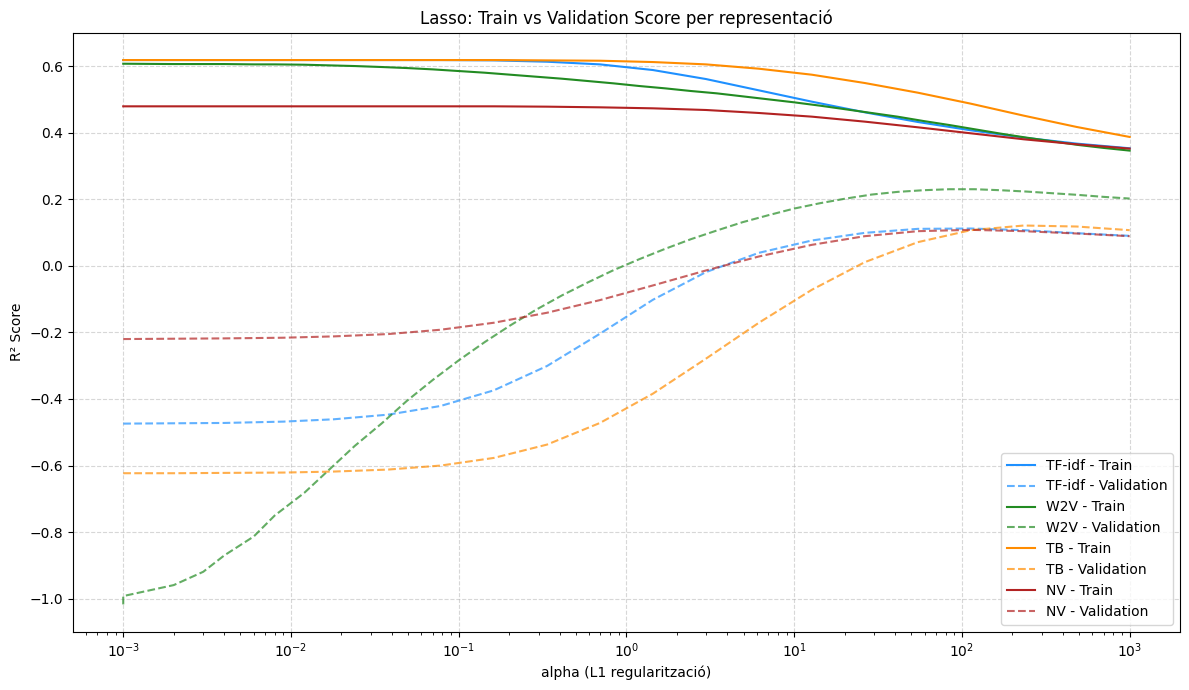

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Diccionari amb fitxers i colors
models = {
    'TF-idf': ('data/ridge_TF-idf.pkl', 'dodgerblue'),
    'W2V':    ('data/ridge_W2V.pkl',    'forestgreen'),
    'TB':     ('data/ridge_TB.pkl',     'darkorange'),
    'NV':     ('data/ridge_NV.pkl',     'firebrick')
}

# Contenidor per a val_score_mean
val_scores_by_model = {}

# Gr√†fic
plt.figure(figsize=(12, 7))

for name, (path, color) in models.items():
    df = pd.read_pickle(path)
    alpha = df['alpha']
    train = df['train_score_mean']
    val = df['val_score_mean']

    # Desa per test estad√≠stic
    val_scores_by_model[name] = val

    # L√≠nies de train i val
    plt.plot(alpha, train, label=f"{name} - Train", color=color, linestyle='-')
    plt.plot(alpha, val, label=f"{name} - Validation", color=color, linestyle='--', alpha=0.7)

plt.xscale('log')
plt.xlabel('alpha (L1 regularitzaci√≥)')
plt.ylabel('R¬≤ Score')
plt.title('Lasso: Train vs Validation Score per representaci√≥')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


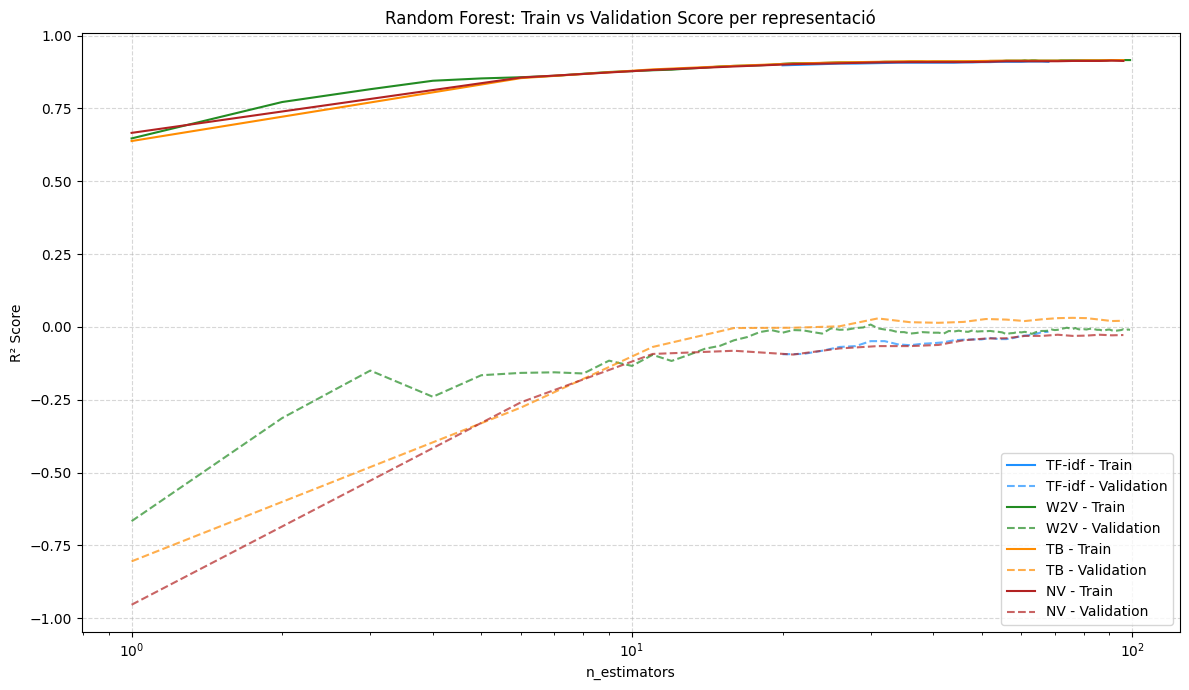

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Diccionari amb fitxers i colors
models = {
    'TF-idf': ('data/rf_TF-idf.pkl', 'dodgerblue'),
    'W2V':    ('data/rf_W2V.pkl',    'forestgreen'),
    'TB':     ('data/rf_TB.pkl',     'darkorange'),
    'NV':     ('data/rf_NV.pkl',     'firebrick')
}

# Contenidor per a val_score_mean
val_scores_by_model = {}

# Gr√†fic
plt.figure(figsize=(12, 7))

for name, (path, color) in models.items():
    df = pd.read_pickle(path)
    alpha = df['n_estimators']
    train = df['train_score_mean']
    val = df['val_score_mean']

    # Desa per test estad√≠stic
    val_scores_by_model[name] = val

    # L√≠nies de train i val
    plt.plot(alpha, train, label=f"{name} - Train", color=color, linestyle='-')
    plt.plot(alpha, val, label=f"{name} - Validation", color=color, linestyle='--', alpha=0.7)

plt.xscale('log')
plt.xlabel('n_estimators')
plt.ylabel('R¬≤ Score')
plt.title('Random Forest: Train vs Validation Score per representaci√≥')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


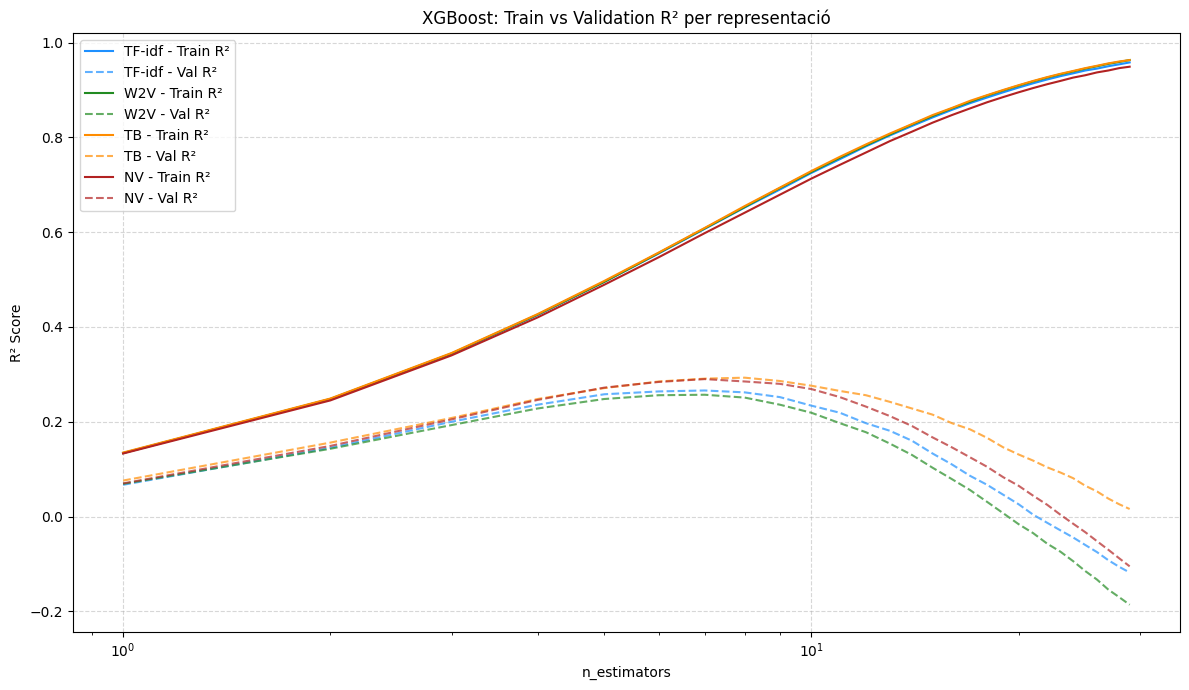

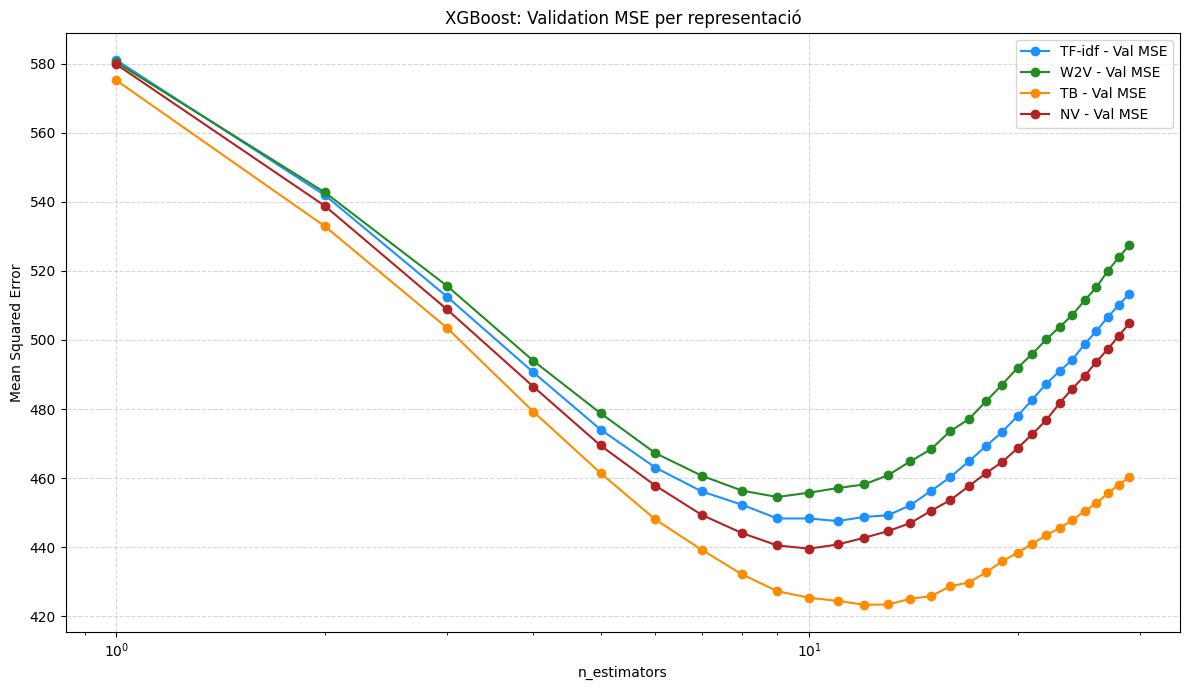


üîç ANOVA sobre val_score_mean (R¬≤):
F-statistic: 3.5735
P-valor: 0.01631
‚ùó Difer√®ncies significatives en R¬≤.

üîç ANOVA sobre val_mse_mean (MSE):
F-statistic: 8.1928
P-valor: 5.601e-05
‚ùó Difer√®ncies significatives en MSE.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Diccionari amb fitxers i colors
models = {
    'TF-idf': ('data/xgb_TF-idf.pkl', 'dodgerblue'),
    'W2V':    ('data/xgb_W2V.pkl',    'forestgreen'),
    'TB':     ('data/xgb_TB.pkl',     'darkorange'),
    'NV':     ('data/xgb_NV.pkl',     'firebrick')
}

val_scores_by_model = {}
val_mse_by_model = {}

# Gr√†fic 1: R¬≤ Score
plt.figure(figsize=(12, 7))
for name, (path, color) in models.items():
    df = pd.read_pickle(path)
    x_axis = df['n_estimators']
    train = df['train_score_mean']
    val = df['val_score_mean']

    val_scores_by_model[name] = val

    plt.plot(x_axis, train, label=f"{name} - Train R¬≤", color=color, linestyle='-')
    plt.plot(x_axis, val, label=f"{name} - Val R¬≤", color=color, linestyle='--', alpha=0.7)

plt.xscale('log')
plt.xlabel('n_estimators')
plt.ylabel('R¬≤ Score')
plt.title('XGBoost: Train vs Validation R¬≤ per representaci√≥')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Gr√†fic 2: MSE
plt.figure(figsize=(12, 7))
for name, (path, color) in models.items():
    df = pd.read_pickle(path)
    x_axis = df['n_estimators']
    val_mse = df['val_mse_mean']

    val_mse_by_model[name] = val_mse

    plt.plot(x_axis, val_mse, label=f"{name} - Val MSE", color=color, linestyle='-', marker='o')

plt.xscale('log')
plt.xlabel('n_estimators')
plt.ylabel('Mean Squared Error')
plt.title('XGBoost: Validation MSE per representaci√≥')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Test estad√≠stic sobre R¬≤
stat_r2, p_r2 = f_oneway(*val_scores_by_model.values())
print("\nüîç ANOVA sobre val_score_mean (R¬≤):")
print(f"F-statistic: {stat_r2:.4f}")
print(f"P-valor: {p_r2:.4g}")
if p_r2 < 0.05:
    print("‚ùó Difer√®ncies significatives en R¬≤.")
else:
    print("‚úÖ No hi ha difer√®ncies significatives en R¬≤.")

# Test estad√≠stic sobre MSE
stat_mse, p_mse = f_oneway(*val_mse_by_model.values())
print("\nüîç ANOVA sobre val_mse_mean (MSE):")
print(f"F-statistic: {stat_mse:.4f}")
print(f"P-valor: {p_mse:.4g}")
if p_mse < 0.05:
    print("‚ùó Difer√®ncies significatives en MSE.")
else:
    print("‚úÖ No hi ha difer√®ncies significatives en MSE.")


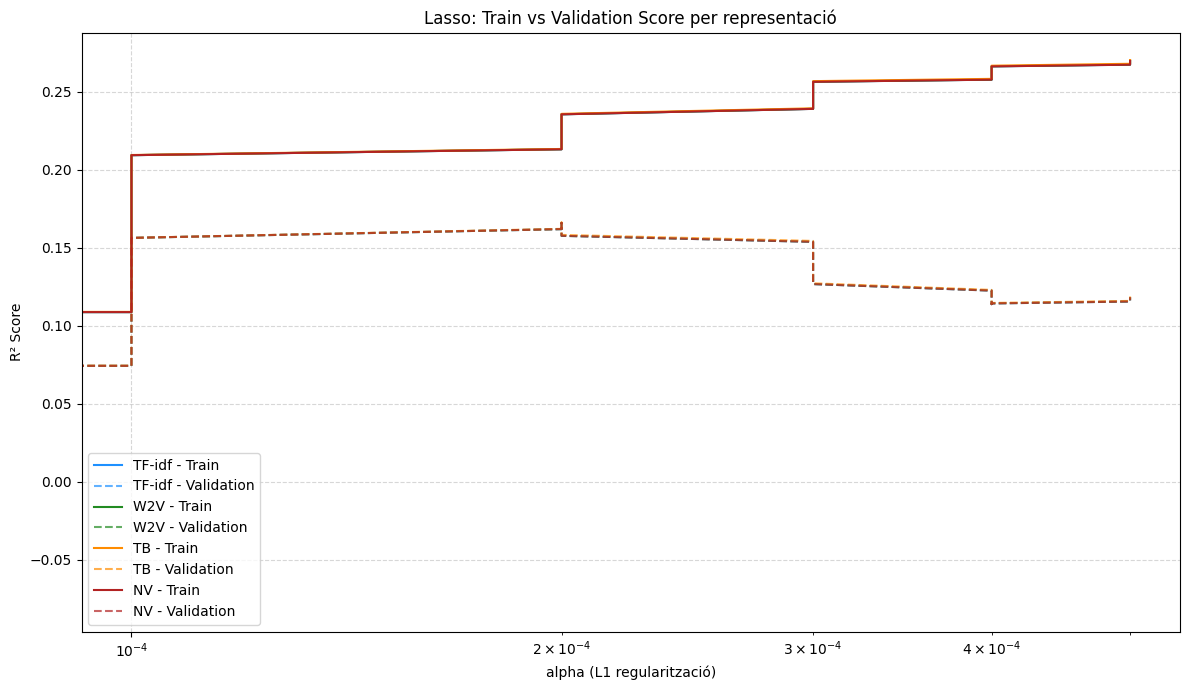

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Diccionari amb fitxers i colors
models = {
    'TF-idf': ('data/svr_TF-idf.pkl', 'dodgerblue'),
    'W2V':    ('data/svr_W2V.pkl',    'forestgreen'),
    'TB':     ('data/svr_TB.pkl',     'darkorange'),
    'NV':     ('data/svr_NV.pkl',     'firebrick')
}

# Contenidor per a val_score_mean
val_scores_by_model = {}

# Gr√†fic
plt.figure(figsize=(12, 7))

for name, (path, color) in models.items():
    df = pd.read_pickle(path)
    alpha = df['C']
    train = df['train_score_mean']
    val = df['val_score_mean']

    # Desa per test estad√≠stic
    val_scores_by_model[name] = val

    # L√≠nies de train i val
    plt.plot(alpha, train, label=f"{name} - Train", color=color, linestyle='-')
    plt.plot(alpha, val, label=f"{name} - Validation", color=color, linestyle='--', alpha=0.7)

plt.xscale('log')
plt.xlabel('alpha (L1 regularitzaci√≥)')
plt.ylabel('R¬≤ Score')
plt.title('Lasso: Train vs Validation Score per representaci√≥')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
